# Projeto 2 - Ciência dos Dados 2020.2

**Participantes**

- Enrico Lopez Borges de Carvalho

- Luana Mitsudo Coelho

- Luiza Valezim Augusto Pinto

- Rodrigo Carvalho Monteiro de Barros

## Introdução

Esse Projeto tem como objetivo tentar prever a nota que diversos jogos receberiam no site *Metacritic*, um site de avaliação de jogos. Para isso, foram levadas em consideração suas características principais (como seu preço, seu gênero, entre outros), informações obtidas em um datasheet do site *Kaggle* em forma de Excel. <br>
Foram selecionadas somente àquelas colunas de características que interessavam para o resultado da previsão.  <br>
O método utilizado foi **INSERIR O NOME DO MÉTODO QUE IREMOS UTILIZAR**, o qual (...)

## Desenvolvimento

**Carregando as bibliotecas**

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#biblioteca de decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

from IPython.display import display

**Carregando a base de dados dos jogos**

In [2]:
filename = 'jogos.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()} :(')

Encontrei o arquivo jogos.xlsx, tudo certo para prosseguir com o projeto!


**Lendo os arquivos de treinamento e de teste**

In [3]:
#cria um dataframe de treinamento e um de teste a partir do documento excel.
jogos_Train = pd.read_excel(filename, sheet_name = 'train')
jogos_Test =pd.read_excel(filename,sheet_name = 'test')

#O codigo não le o dataframe inteiro a menos que ele esteja esposto, se não ele le apenas o "resumo" que aparece no 'print'.
#Estas funções fazem com que o conteúdo por inteiro seja exposto. 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

#transforma a coluna "Laguages" de uma lista de linguas para uma quantidade de linguas disponiveis
for L in range(len(jogos_Train.Languages)):
    lista_linguas = str(jogos_Train.Languages[L]).split(",")
    quantidade = len(lista_linguas)
    jogos_Train.Languages[L] = quantidade

C:\Users\luiza\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
#jogos_Test.head(5)

### Descrição das variaveis da tabela final:
 
 **(precisamos fazer isso aqui!)**

### Gráficos

**Quantidade por faixa de preço**

Text(0.5, 1.0, 'Quantidade de jogos por preço do jogo na data de lançamento ')

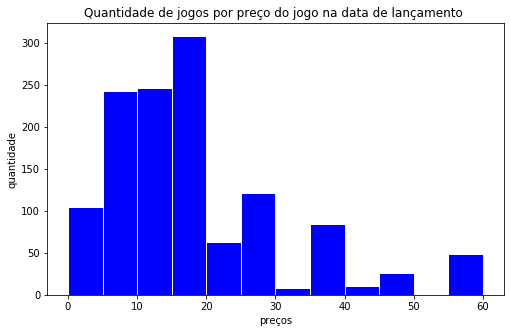

In [5]:
preco_inicial=jogos_Train.OriginalCost

faixas = np.arange(0,65,5)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(preco_inicial, bins=faixas,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('preços')
plt.title('Quantidade de jogos por preço do jogo na data de lançamento ')

**Quantidade por classificação se é indie ou não**

Text(0.5, 1.0, 'Quantidade de jogos por classificação se é indie ou não')

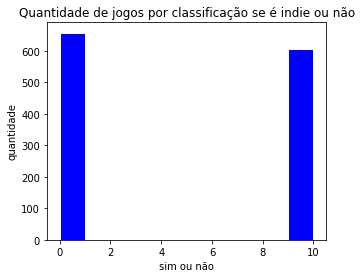

In [6]:
jogos_indie = jogos_Train.Indie

plt.figure(figsize=(5, 4))

plt.hist(jogos_indie,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('sim ou não')
plt.title('Quantidade de jogos por classificação se é indie ou não')

**Quantidade por número de vezes mencionado em redes sociais (presença/relevância)**

Text(0.5, 1.0, 'Quantidade de jogos por número de vezes mencionados em redes sociais')

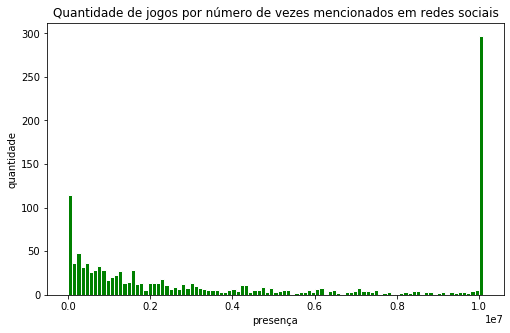

In [7]:
Presence_inicial=jogos_Train.Presence

faixas_Presence = np.linspace(Presence_inicial.min(),Presence_inicial.max(),100)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(Presence_inicial, bins=faixas_Presence, color='green', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('presença')
plt.title('Quantidade de jogos por número de vezes mencionados em redes sociais')

**Quantidade por nota do Metacritic**

Text(0.5, 1.0, 'Quantidade de jogos por nota do Metacritic')

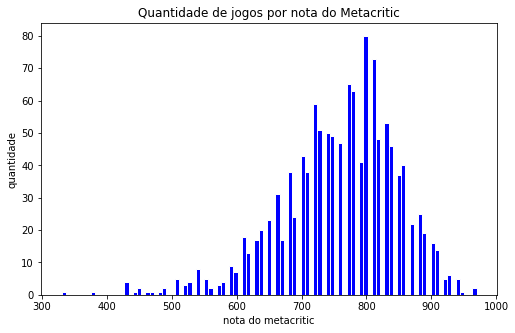

In [8]:
metacritic_inicial=jogos_Train.Metacritic

faixas_metacritic = np.linspace(metacritic_inicial.min(),metacritic_inicial.max(),100)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(metacritic_inicial, bins=faixas_metacritic,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('nota do metacritic')
plt.title('Quantidade de jogos por nota do Metacritic')

**Nota do Metacritic por preço na data de lançamento, quantidade de achievements, quantidade de citações sobre o jogo na internet e**

Text(0, 0.5, 'nota do metacritic')

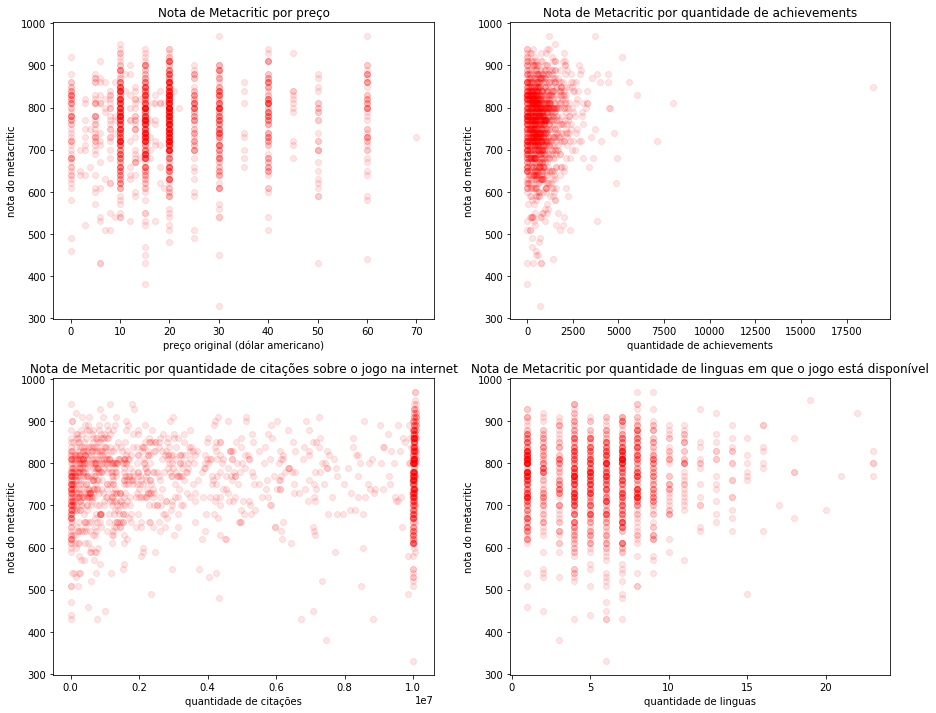

In [9]:
plt.figure(figsize=(15, 12))

plt.subplot(221)
plt.scatter(jogos_Train.OriginalCost,jogos_Train.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por preço')
plt.xlabel('preço original (dólar americano)')
plt.ylabel('nota do metacritic')

plt.subplot(222)
plt.scatter(jogos_Train.Achievements,jogos_Train.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de achievements')
plt.xlabel('quantidade de achievements')
plt.ylabel('nota do metacritic')

plt.subplot(223)
plt.scatter(jogos_Train.Presence,jogos_Train.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de citações sobre o jogo na internet')
plt.xlabel('quantidade de citações')
plt.ylabel('nota do metacritic')

plt.subplot(224)
plt.scatter(jogos_Train.Languages,jogos_Train.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de linguas em que o jogo está disponível')
plt.xlabel('quantidade de linguas')
plt.ylabel('nota do metacritic')

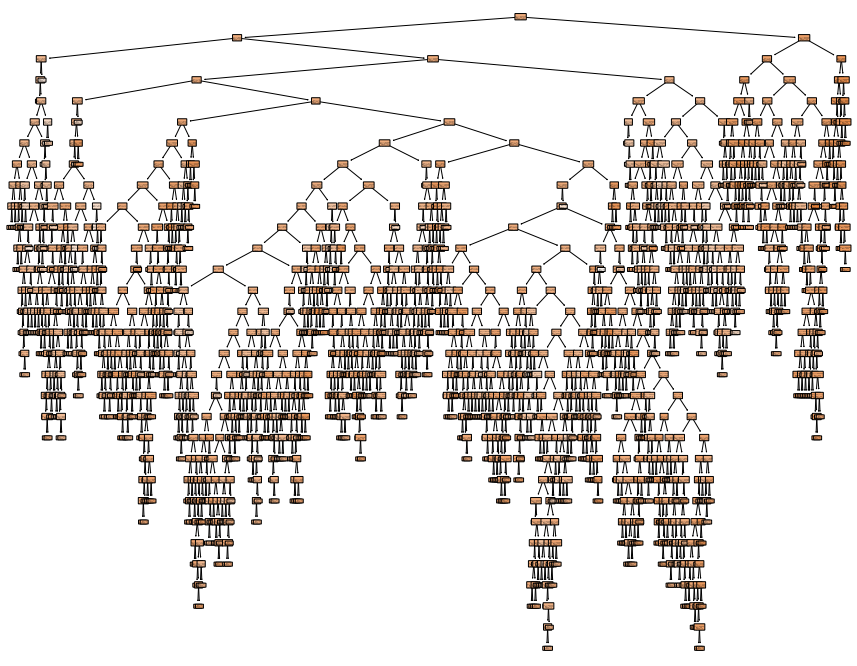

In [10]:
X = jogos_Train.drop('Metacritic',axis=1).drop('Name',axis=1).drop('Genres',axis=1).drop('Platform',axis=1).drop('Players',axis=1).copy()
y = jogos_Train.Metacritic.copy()

X.dtypes
#len(X.Achievements.unique())

previsao_teste = DecisionTreeRegressor()
previsao_teste = previsao_teste.fit(X, y)

plt.figure(figsize=(15, 12))
plot_tree(previsao_teste, filled=True, rounded=True);

In [11]:
textog=",".join(jogos_Train.Genres)
textog=textog.split(",")
lista_gen=[]
for el in textog:
    if el not in lista_gen and el[0]!=" ":
        lista_gen.append(el)
print(lista_gen)

['Action', 'Massively Multiplayer', 'Strategy', 'Racing', 'RPG', 'Simulation', 'Casual', 'Adventure', 'Indie', 'Sports', 'Free to Play']


In [12]:
textplat=",".join(jogos_Train.Platform)
textplat=textplat.split(",")
lista_plat=[]
for el in textplat:
    if el not in lista_plat and el[0]!=" ":
        lista_plat.append(el)
print(lista_plat)

['PC', 'PlayStation 5', 'PlayStation 4', 'Linux', 'Xbox One', 'macOS', 'Android', 'iOS', 'Nintendo Switch', 'PlayStation 3', 'Xbox 360', 'Nintendo 3DS', 'GameCube', 'SNES', 'PS Vita', 'Nintendo DS', 'PlayStation 2', 'Xbox', 'Wii', 'PlayStation', 'Dreamcast']


In [14]:
textplayers=",".join(jogos_Train.Players)
textplayers=textplayers.split(",")
lista_players=[]
for el in textplayers:
    if el not in lista_players and el[0]!=" ":
        lista_players.append(el)
print(lista_players)

['multiplayer', 'singleplayer', 'coop', 'pvp', 'online coop']


In [15]:
for elem in lista_gen:
    filtrod=jogos_Train.Genres.str.contains(f"{elem}")
    jogos_Train.loc[filtrod,f"{elem}gender"]=filtrod

In [ ]:
for ele in lista_plat:
    filtrodd=jogos_Train.Platform.str.contains(f"{ele}")
    jogos_Train.loc[filtrodd,f"{ele}"]=filtrodd

In [16]:
for ele in lista_players:
    filtroddd=jogos_Train.Players.str.contains(f"{ele}")
    jogos_Train.loc[filtroddd,f"{ele}"]=filtroddd

In [17]:
del jogos_Train["Players"]
del jogos_Train["Genres"]
del jogos_Train["Platform"]

In [18]:
jogos_Train = jogos_Train.replace(np.nan, False, regex=True)
jogos_Train.head(5)

,Name,Metacritic,Indie,Presence,OriginalCost,Languages,Achievements,Actiongender,Massively Multiplayergender,Strategygender,...,Casualgender,Adventuregender,Indiegender,Sportsgender,Free to Playgender,multiplayer,singleplayer,coop,pvp,online coop
0,Counter-Strike: Global Offensive,830,0,10095880,0.00,23,1790,True,False,False,...,False,False,False,False,True,True,False,True,True,True
1,Destiny 2,820,0,10074250,0.00,8,610,True,False,False,...,False,True,False,False,True,True,False,True,False,True
2,The Elder Scrolls Online,710,0,10007810,19.99,4,0,False,True,False,...,False,False,False,False,False,True,True,True,False,False
3,Sea of Thieves,680,0,7774560,39.99,5,3080,True,False,False,...,False,True,False,False,False,True,False,True,True,True
4,Tom Clancy's Rainbow Six Siege,750,0,10014240,19.99,12,820,True,False,False,...,False,False,False,False,False,True,True,True,False,True


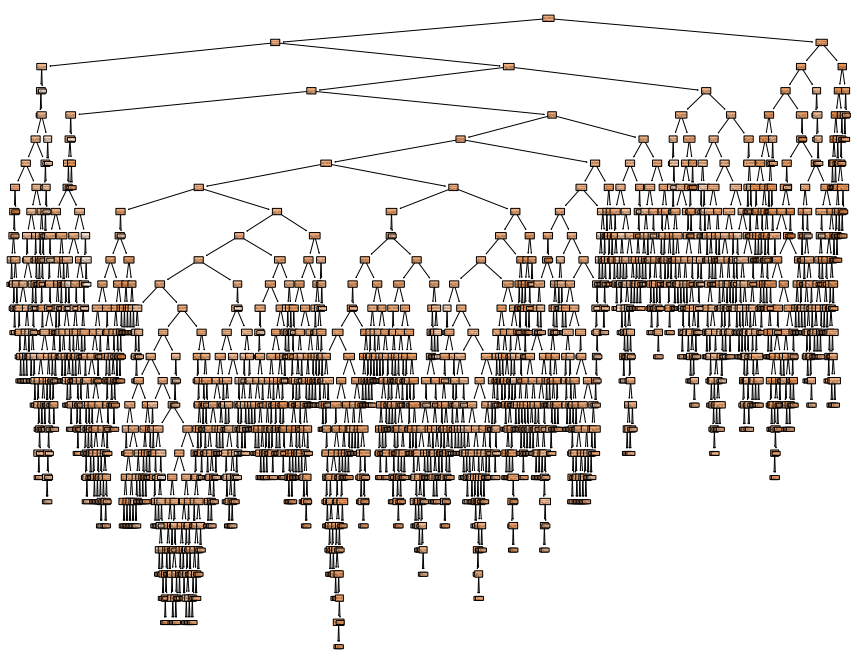

In [19]:
A = jogos_Train.drop('Metacritic',axis=1).drop('Name',axis=1).copy()
B = jogos_Train.Metacritic.copy()

previsao_teste = DecisionTreeRegressor()
previsao_teste = previsao_teste.fit(A,B)

plt.figure(figsize=(15, 12))
plot_tree(previsao_teste, filled=True, rounded=True);

In [20]:
plt.bar(jogos_Train['Metacritic'],jogos_Train['Action'])

KeyError: 'Action'

## Referencias:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

video maravilindo sobre montar decision tree em python: <br>
https://www.youtube.com/watch?v=q90UDEgYqeI&ab_channel=StatQuestwithJoshStarmer